# Pre-procesamiento de datos continuos

Entendemos por datos continuos a aquellos datos numéricos que pueden tomar cualquier valor (real) en un rango preestablecido. Algunos ejemplos de datos continuos son:

- La *altura de una persona* puede ser cualquier valor decimal comprendido entre 0 e $\infty$.
- La *distancia entre dos ciudades* puede ser cualquier valor decimal comprendido entre 0 e $\infty$.
- La *temperatura de una ciudad* puede ser cualquier valor decimal comprendido entre $-\infty$ y $\infty$.

Los datos continuos son los más habituales dentro del ecosistema del *machine learning* por lo que el correcto tratamiento de estos es fundamental para alcanzar los resultados esperados. El principal problema de este tipo de datos es que no disponen de una escala homogénea, por lo que, cada dato, se mueve en un rango diferente al del resto, lo que dificulta enormemente el aprendizaje a partir de los mismos.

Generalmente, a los datos continuos se les realiza una transformación con el fin de acotarlos a un rango de valores que permita compararlos entre si independientemente de su naturaleza. Desgraciadamente, este proceso no es trivial, y requiere un análisis previo de los datos con el fin de conocer cómo se organizan para tratarlos de forma adecuada.

Por ejemplo, podemos disponer de datos que sigan una distribución uniforme en la que sus parámetros más relevantes son los valores máximo y mínimo que abarcan los datos.

<AxesSubplot:ylabel='Density'>

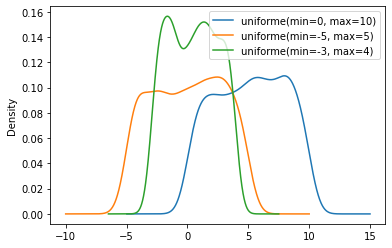

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

uniform_df = pd.DataFrame()

uniform_df[r'uniforme(min=0, max=10)'] = np.random.uniform(0, 10, 1000)
uniform_df[r'uniforme(min=-5, max=5)'] = np.random.uniform(-5, 5, 1000)
uniform_df[r'uniforme(min=-3, max=4)'] = np.random.uniform(-3, 4, 1000)

uniform_df.plot.kde()

Es muy frecuente encontrar que los datos siguen una distribución normal con media $\mu$ y desviación típica $\sigma$.

<AxesSubplot:ylabel='Density'>

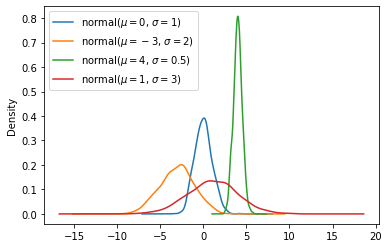

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

normal_df = pd.DataFrame()

normal_df[r'normal($\mu=0$, $\sigma=1$)'] = np.random.normal(0, 1, 1000)
normal_df[r'normal($\mu=-3$, $\sigma=2$)'] = np.random.normal(-3, 2, 1000)
normal_df[r'normal($\mu=4$, $\sigma=0.5$)'] = np.random.normal(4, 0.5, 1000)
normal_df[r'normal($\mu=1$, $\sigma=3$)'] = np.random.normal(1, 3, 1000)

normal_df.plot.kde()

En otras ocasiones, encontraremos que los datos siguen distribuciones menos frecuentes, como la beta, que pueden llegar a ser incluso multimodales.

<AxesSubplot:ylabel='Density'>

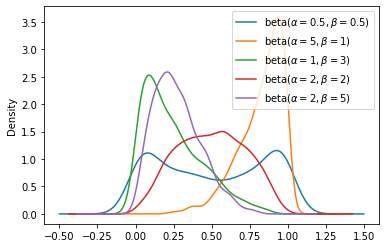

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

beta_df = pd.DataFrame()

beta_df[r'beta($\alpha=0.5, \beta=0.5$)'] = np.random.beta(0.5, 0.5, 1000)
beta_df[r'beta($\alpha=5, \beta=1$)'] = np.random.beta(5, 1, 1000)
beta_df[r'beta($\alpha=1, \beta=3$)'] = np.random.beta(1, 3, 1000)
beta_df[r'beta($\alpha=2, \beta=2$)'] = np.random.beta(2, 2, 1000)
beta_df[r'beta($\alpha=2, \beta=5$)'] = np.random.beta(2, 5, 1000)

beta_df.plot.kde()

También es frecuente encontrar otras distribuciones como la possion con soporte restringido (solo toma valores positivos).

<AxesSubplot:ylabel='Density'>

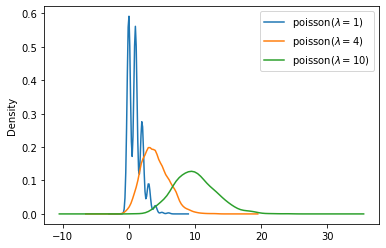

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

poisson_df = pd.DataFrame()

poisson_df[r'poisson($\lambda=1$)'] = np.random.poisson(1, 1000)
poisson_df[r'poisson($\lambda=4$)'] = np.random.poisson(4, 1000)
poisson_df[r'poisson($\lambda=10$)'] = np.random.poisson(10, 1000)

poisson_df.plot.kde(ind=100)

A continuación, veremos algunos ejemplos de las transformaciones que podemos realizar y su impacto en los datos generados por las distribuciones anteriores. Estos transformadores se pueden encontrar en el módulo [`preprocessing`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) de `sklearn`.

## StandardScaler

La **estandarización** es el proceso a partir del cual un conjunto de datos que siguen una distribución normal, hecho que sucede con la mayoría de los datos empleados en *machine learning*, son transformados a una distribución normal con media 0 y desviación típica 1. Para ello, se realiza la siguiente operación:

$x^\prime_i = \frac{x_i - \mu}{\sigma}$

Donde $x_i$ es el dato que queremos estandarizar, $\mu$ es el valor medio de todos los datos y $\sigma$ es la desviación típica de todos los datos.

Ilustremos esto con un ejemplo. Asumamos que tenemos la siguiente matriz de datos en la que las filas son las muestras y las columnas las características:

In [5]:
import numpy as np

X = np.array([[ 1., -1.,  2.],
              [ 2.,  0.,  0.],
              [ 0.,  1., -1.]])

Podemos emplear la clase [preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) de `sklearn`para estandarizar las características (i.e. las columnas):

In [6]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

Como vemos, los datos han sido transformados a unos nuevos estandarizados. Si analizamos la media y desviación típica de estos datos observamos lo siguiente:

In [7]:
X_scaled.mean(axis=0)

array([0., 0., 0.])

In [8]:
X_scaled.std(axis=0)

array([1., 1., 1.])

La media de cada característica ha sido centrada en el 0 y la desviación típica puesta en 1. Si comparamos esto con los datos sin estandarizar vemos la diferencia:

In [9]:
X.mean(axis=0)

array([1.        , 0.        , 0.33333333])

In [10]:
X.std(axis=0)

array([0.81649658, 0.81649658, 1.24721913])

Podemos observar cómo se han modificado los datos para que todos ellos sigan una distribución normal de media 0 y desviación típica 1.

Analizamos ahora el comportamiento del `StandardScaler` sobre las distribuciones uniforme, normal, beta y poisson. 

<AxesSubplot:title={'center':'StandardScaler'}, ylabel='Density'>

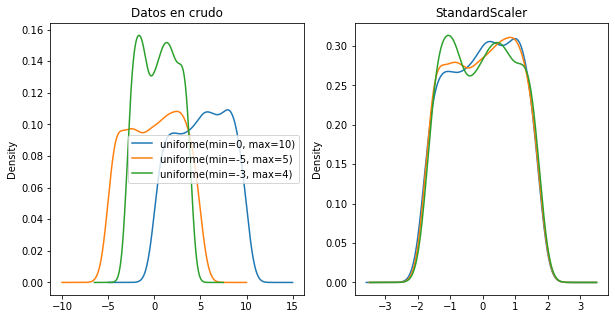

In [11]:
from sklearn.preprocessing import StandardScaler

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

axs[0].set_title('Datos en crudo')
uniform_df.plot.kde(ax=axs[0])

axs[1].set_title('StandardScaler')
transformed_df = pd.DataFrame(StandardScaler().fit_transform(uniform_df))
transformed_df.plot.kde(ax=axs[1], legend=False)

<AxesSubplot:title={'center':'StandardScaler'}, ylabel='Density'>

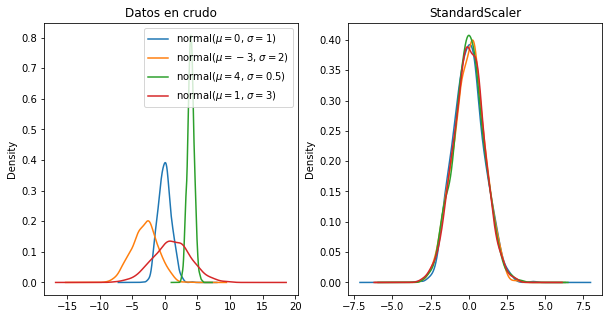

In [12]:
from sklearn.preprocessing import StandardScaler

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

axs[0].set_title('Datos en crudo')
normal_df.plot.kde(ax=axs[0])

axs[1].set_title('StandardScaler')
transformed_df = pd.DataFrame(StandardScaler().fit_transform(normal_df))
transformed_df.plot.kde(ax=axs[1], legend=False)

<AxesSubplot:title={'center':'StandardScaler'}, ylabel='Density'>

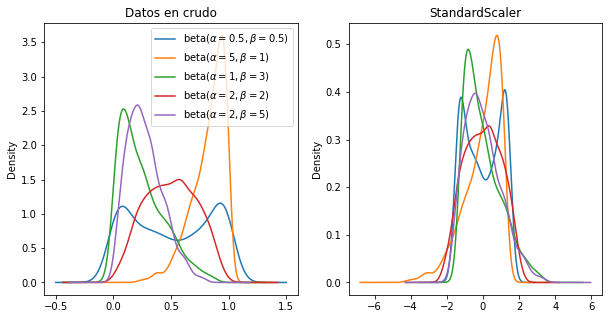

In [13]:
from sklearn.preprocessing import StandardScaler

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

axs[0].set_title('Datos en crudo')
beta_df.plot.kde(ax=axs[0])

axs[1].set_title('StandardScaler')
transformed_df = pd.DataFrame(StandardScaler().fit_transform(beta_df))
transformed_df.plot.kde(ax=axs[1], legend=False)

<AxesSubplot:title={'center':'StandardScaler'}, ylabel='Density'>

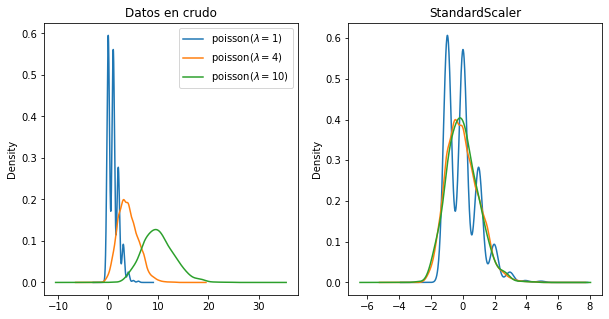

In [14]:
from sklearn.preprocessing import StandardScaler

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

axs[0].set_title('Datos en crudo')
poisson_df.plot.kde(ax=axs[0])

axs[1].set_title('StandardScaler')
transformed_df = pd.DataFrame(StandardScaler().fit_transform(poisson_df))
transformed_df.plot.kde(ax=axs[1], legend=False)

## MinMaxScaler

Existe otra alternativa para la estandarización de las características que consiste en ajustarlas en un rango predefinido, generalmente en el rango $[0, 1]$. Usualmente se utiliza cuando se tienen datos con una desviación típica muy pequeña.

Para la realización de este escalado usaremos la clase [preprocessing.MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler). Si queremos normalizar en la escala $[0, 1]$ usaremos:

In [15]:
from sklearn.preprocessing import MinMaxScaler

X_scaled = MinMaxScaler().fit_transform(X)
X_scaled

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

Si queremos emplear otro rango simplemente debemos indicar, mediante una dupla, la escala deseada en el constructor del objeto:

In [16]:
X_scaled = MinMaxScaler((1,5)).fit_transform(X)
X_scaled

array([[3.        , 1.        , 5.        ],
       [5.        , 3.        , 2.33333333],
       [1.        , 5.        , 1.        ]])

Analizamos ahora el comportamiento del `MinMaxScaler` sobre las distribuciones uniforme, normal, beta y poisson. 

<AxesSubplot:title={'center':'MinMaxScaler'}, ylabel='Density'>

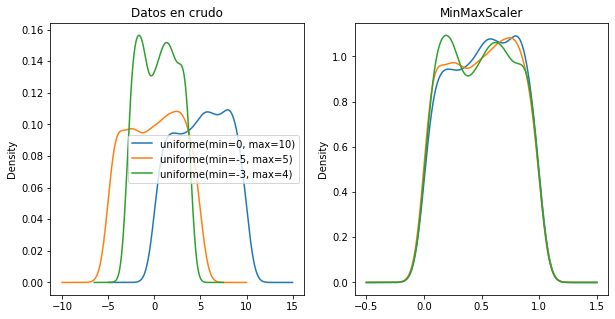

In [17]:
from sklearn.preprocessing import MinMaxScaler

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

axs[0].set_title('Datos en crudo')
uniform_df.plot.kde(ax=axs[0])

axs[1].set_title('MinMaxScaler')
transformed_df = pd.DataFrame(MinMaxScaler().fit_transform(uniform_df))
transformed_df.plot.kde(ax=axs[1], legend=False)

<AxesSubplot:title={'center':'MinMaxScaler'}, ylabel='Density'>

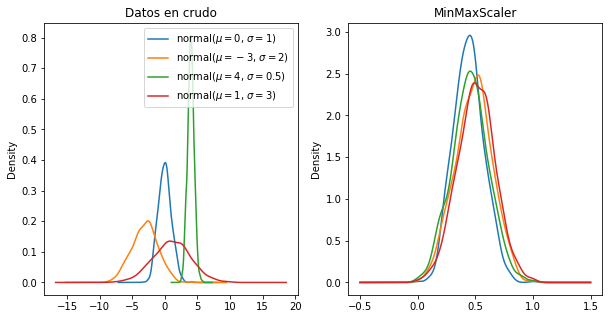

In [18]:
from sklearn.preprocessing import MinMaxScaler

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

axs[0].set_title('Datos en crudo')
normal_df.plot.kde(ax=axs[0])

axs[1].set_title('MinMaxScaler')
transformed_df = pd.DataFrame(MinMaxScaler().fit_transform(normal_df))
transformed_df.plot.kde(ax=axs[1], legend=False)

<AxesSubplot:title={'center':'MinMaxScaler'}, ylabel='Density'>

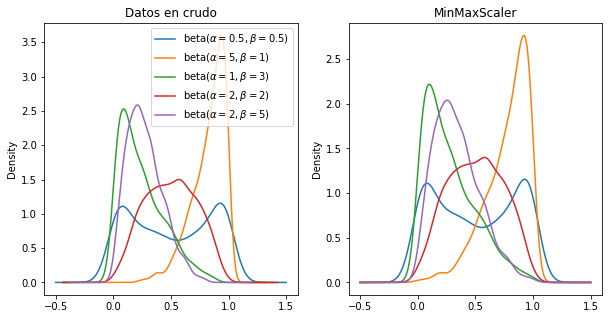

In [19]:
from sklearn.preprocessing import MinMaxScaler

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

axs[0].set_title('Datos en crudo')
beta_df.plot.kde(ax=axs[0])

axs[1].set_title('MinMaxScaler')
transformed_df = pd.DataFrame(MinMaxScaler().fit_transform(beta_df))
transformed_df.plot.kde(ax=axs[1], legend=False)

<AxesSubplot:title={'center':'MinMaxScaler'}, ylabel='Density'>

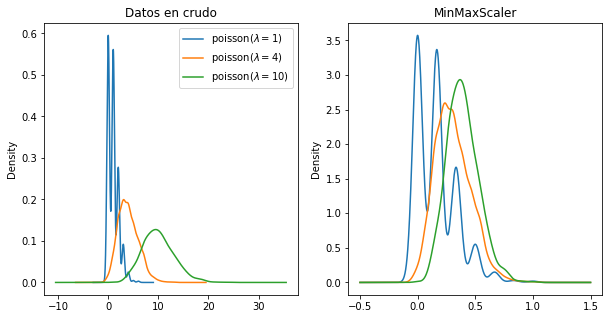

In [20]:
from sklearn.preprocessing import MinMaxScaler

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

axs[0].set_title('Datos en crudo')
poisson_df.plot.kde(ax=axs[0])

axs[1].set_title('MinMaxScaler')
transformed_df = pd.DataFrame(MinMaxScaler().fit_transform(poisson_df))
transformed_df.plot.kde(ax=axs[1], legend=False)

## RobustScaler

El [`RobustScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler) se caracteriza por transformar los datos empleando estadísticos robustos a los valores atípicos (*outliers*). La transformación se realiza suprimiendo la mediana y escalando los datos de acuerdo con su rango intercuartílico.

Veamos su uso sobre las distribuciones uniforme, normal, beta y poisson.

<AxesSubplot:title={'center':'RobustScaler'}, ylabel='Density'>

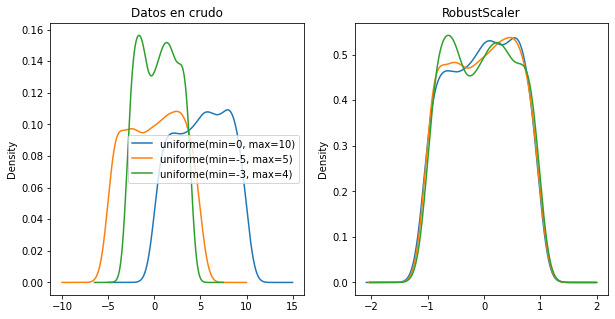

In [21]:
from sklearn.preprocessing import RobustScaler

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

axs[0].set_title('Datos en crudo')
uniform_df.plot.kde(ax=axs[0])

axs[1].set_title('RobustScaler')
transformed_df = pd.DataFrame(RobustScaler().fit_transform(uniform_df))
transformed_df.plot.kde(ax=axs[1], legend=False)

<AxesSubplot:title={'center':'RobustScaler'}, ylabel='Density'>

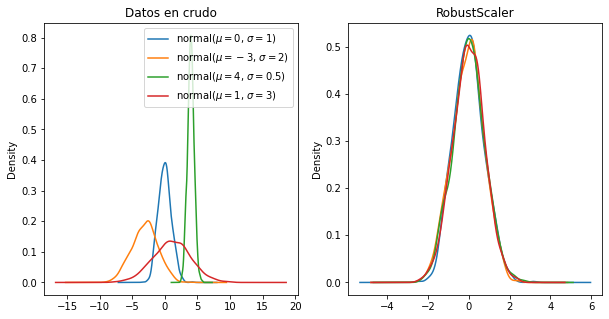

In [22]:
from sklearn.preprocessing import RobustScaler

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

axs[0].set_title('Datos en crudo')
normal_df.plot.kde(ax=axs[0])

axs[1].set_title('RobustScaler')
transformed_df = pd.DataFrame(RobustScaler().fit_transform(normal_df))
transformed_df.plot.kde(ax=axs[1], legend=False)

<AxesSubplot:title={'center':'RobustScaler'}, ylabel='Density'>

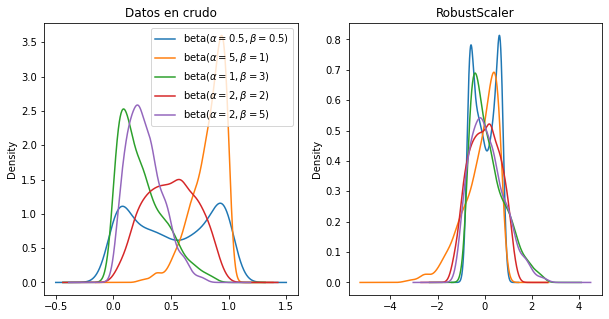

In [23]:
from sklearn.preprocessing import RobustScaler

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

axs[0].set_title('Datos en crudo')
beta_df.plot.kde(ax=axs[0])

axs[1].set_title('RobustScaler')
transformed_df = pd.DataFrame(RobustScaler().fit_transform(beta_df))
transformed_df.plot.kde(ax=axs[1], legend=False)

<AxesSubplot:title={'center':'RobustScaler'}, ylabel='Density'>

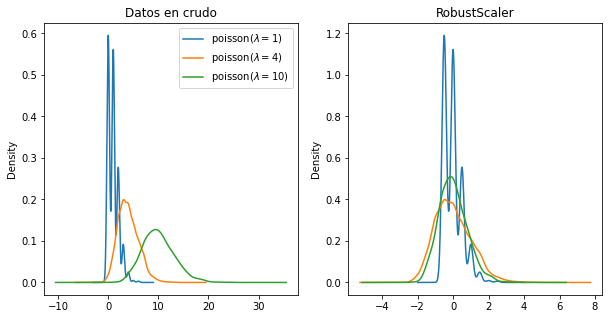

In [24]:
from sklearn.preprocessing import RobustScaler

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

axs[0].set_title('Datos en crudo')
poisson_df.plot.kde(ax=axs[0])

axs[1].set_title('RobustScaler')
transformed_df = pd.DataFrame(RobustScaler().fit_transform(poisson_df))
transformed_df.plot.kde(ax=axs[1], legend=False)

## PowerTransformer

El [`PowerTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html#sklearn.preprocessing.PowerTransformer) realiza una transformación de los datos para hacerlos más Gausianos. Está especialmente indicado cuando los datos tienen una varianza no constante. La transformación se realiza mediante el método de Yeo-Johnson (*Yeo, I. K., & Johnson, R. A. (2000). A new family of power transformations to improve normality or symmetry. Biometrika, 87(4), 954-959.*).

Veamos su desempeño sobre las distribuciones uniforme, normal, beta y poisson.

<AxesSubplot:title={'center':'PowerTransformer'}, ylabel='Density'>

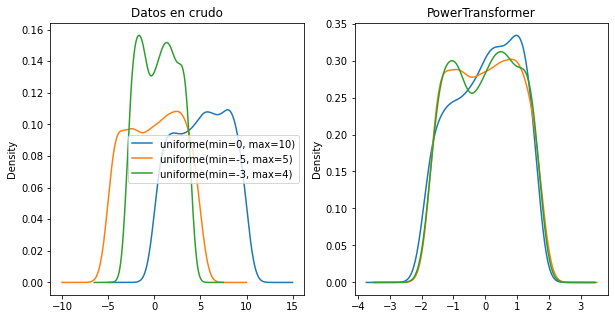

In [25]:
from sklearn.preprocessing import PowerTransformer

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

axs[0].set_title('Datos en crudo')
uniform_df.plot.kde(ax=axs[0])

axs[1].set_title('PowerTransformer')
transformed_df = pd.DataFrame(PowerTransformer().fit_transform(uniform_df))
transformed_df.plot.kde(ax=axs[1], legend=False)

<AxesSubplot:title={'center':'PowerTransformer'}, ylabel='Density'>

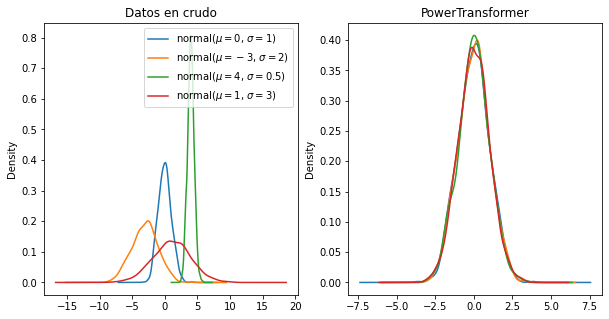

In [26]:
from sklearn.preprocessing import PowerTransformer

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

axs[0].set_title('Datos en crudo')
normal_df.plot.kde(ax=axs[0])

axs[1].set_title('PowerTransformer')
transformed_df = pd.DataFrame(PowerTransformer().fit_transform(normal_df))
transformed_df.plot.kde(ax=axs[1], legend=False)

<AxesSubplot:title={'center':'PowerTransformer'}, ylabel='Density'>

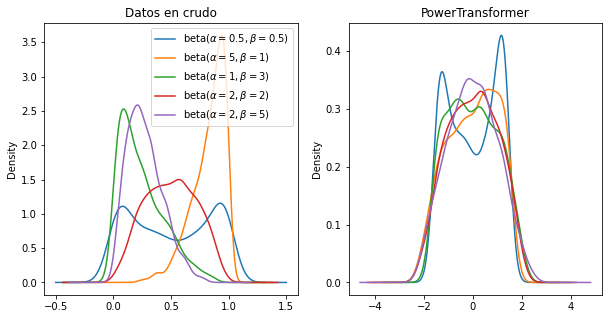

In [27]:
from sklearn.preprocessing import PowerTransformer

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

axs[0].set_title('Datos en crudo')
beta_df.plot.kde(ax=axs[0])

axs[1].set_title('PowerTransformer')
transformed_df = pd.DataFrame(PowerTransformer().fit_transform(beta_df))
transformed_df.plot.kde(ax=axs[1], legend=False)

<AxesSubplot:title={'center':'PowerTransformer'}, ylabel='Density'>

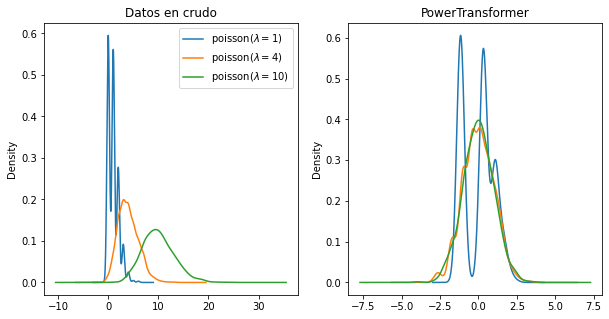

In [28]:
from sklearn.preprocessing import PowerTransformer

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

axs[0].set_title('Datos en crudo')
poisson_df.plot.kde(ax=axs[0])

axs[1].set_title('PowerTransformer')
transformed_df = pd.DataFrame(PowerTransformer().fit_transform(poisson_df))
transformed_df.plot.kde(ax=axs[1], legend=False)

## QuantileTransformer

El [`QuantileTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html#sklearn.preprocessing.QuantileTransformer) permite transformar cualquier distribución a una distribución normal o uniforme. Por ello, la transformación tiene a diseminar los valores más frecuentes y a minimizar el impacto de los *outliers*.

Esta transformación es profundamente no lineal, por lo que puede distorsionar las correlaciones lineales entre las variables. El proceso de transformación primero utiliza la función de distribución acumulada de los datos para asignarlos a una distribución uniforme. A continuación, los valores obtenidos se asignan a la distribución de salida deseada utilizando la función cuantil asociada. 

Analizemos su impacto con los datos de la distribución uniforme, normal, beta y poisson.

<AxesSubplot:title={'center':'QuantileTransformer (normal)'}, ylabel='Density'>

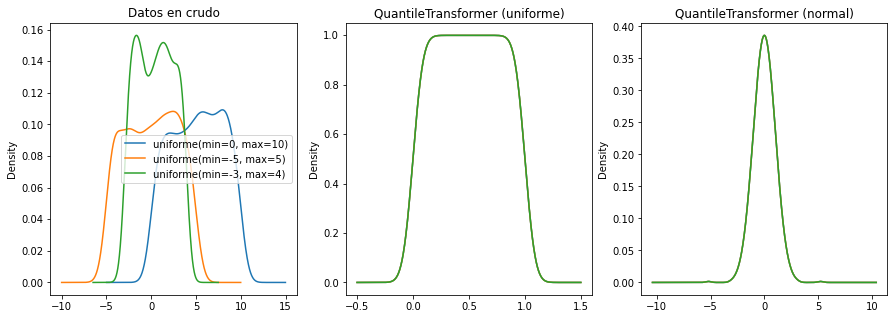

In [29]:
from sklearn.preprocessing import QuantileTransformer

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

axs[0].set_title('Datos en crudo')
uniform_df.plot.kde(ax=axs[0])

axs[1].set_title('QuantileTransformer (uniforme)')
transformed_df = pd.DataFrame(QuantileTransformer(output_distribution='uniform').fit_transform(uniform_df))
transformed_df.plot.kde(ax=axs[1], legend=False)

axs[2].set_title('QuantileTransformer (normal)')
transformed_df = pd.DataFrame(QuantileTransformer(output_distribution='normal').fit_transform(uniform_df))
transformed_df.plot.kde(ax=axs[2], legend=False)

<AxesSubplot:title={'center':'QuantileTransformer (normal)'}, ylabel='Density'>

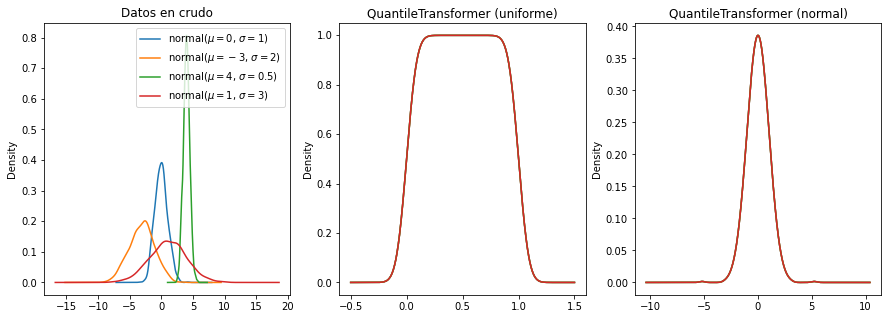

In [30]:
from sklearn.preprocessing import QuantileTransformer

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

axs[0].set_title('Datos en crudo')
normal_df.plot.kde(ax=axs[0])

axs[1].set_title('QuantileTransformer (uniforme)')
transformed_df = pd.DataFrame(QuantileTransformer(output_distribution='uniform').fit_transform(normal_df))
transformed_df.plot.kde(ax=axs[1], legend=False)

axs[2].set_title('QuantileTransformer (normal)')
transformed_df = pd.DataFrame(QuantileTransformer(output_distribution='normal').fit_transform(normal_df))
transformed_df.plot.kde(ax=axs[2], legend=False)

<AxesSubplot:title={'center':'QuantileTransformer (normal)'}, ylabel='Density'>

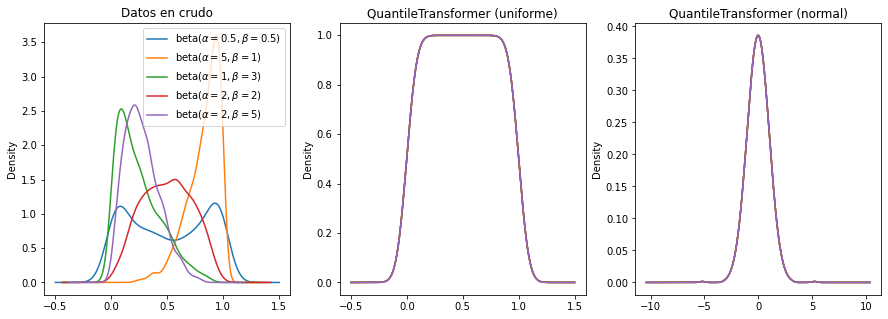

In [31]:
from sklearn.preprocessing import QuantileTransformer

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

axs[0].set_title('Datos en crudo')
beta_df.plot.kde(ax=axs[0])

axs[1].set_title('QuantileTransformer (uniforme)')
transformed_df = pd.DataFrame(QuantileTransformer(output_distribution='uniform').fit_transform(beta_df))
transformed_df.plot.kde(ax=axs[1], legend=False)

axs[2].set_title('QuantileTransformer (normal)')
transformed_df = pd.DataFrame(QuantileTransformer(output_distribution='normal').fit_transform(beta_df))
transformed_df.plot.kde(ax=axs[2], legend=False)

<AxesSubplot:title={'center':'QuantileTransformer (normal)'}, ylabel='Density'>

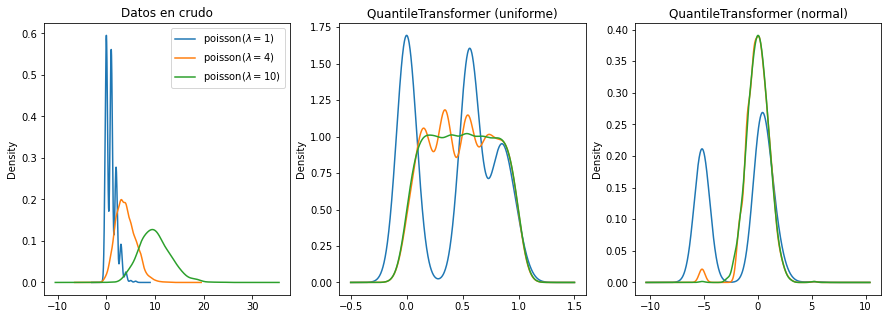

In [32]:
from sklearn.preprocessing import QuantileTransformer

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

axs[0].set_title('Datos en crudo')
poisson_df.plot.kde(ax=axs[0])

axs[1].set_title('QuantileTransformer (uniforme)')
transformed_df = pd.DataFrame(QuantileTransformer(output_distribution='uniform').fit_transform(poisson_df))
transformed_df.plot.kde(ax=axs[1], legend=False)

axs[2].set_title('QuantileTransformer (normal)')
transformed_df = pd.DataFrame(QuantileTransformer(output_distribution='normal').fit_transform(poisson_df))
transformed_df.plot.kde(ax=axs[2], legend=False)

## Discretización

En ciertas ocasiones, existen datos continuos para los que es poco relevante el valor del dato en si y es más significativo si el propio datos es mayor, igual o menor que el resto de datos de la característica analizada. En dichos casos, en lugar de transformar los datos para hacerlos parecer más uniformes o normales, se tienda a discretizarlos.

El [`Binarizer`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Binarizer.html#sklearn.preprocessing.Binarizer) es un transformador que permite transformar cualquier dato continuo a los valores 0 ó 1 en función de un umbral (`threshold`):

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Binarizer(threshold=0.3)'}, ylabel='count'>

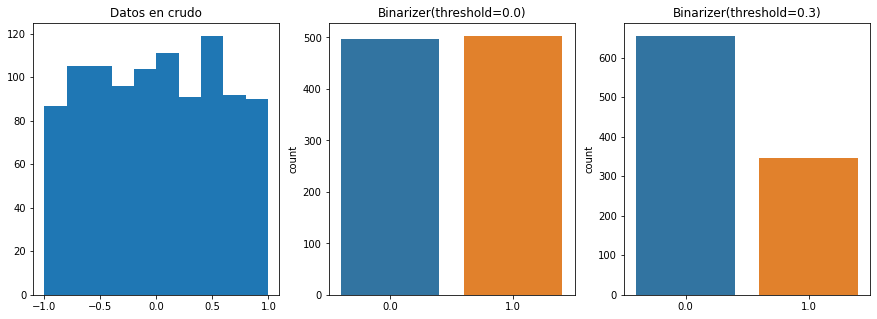

In [33]:
import seaborn as sns
from sklearn.preprocessing import Binarizer

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

data = np.random.uniform(-1, 1, 1000).reshape(-1, 1)

axs[0].set_title('Datos en crudo')
axs[0].hist(data)

axs[1].set_title('Binarizer(threshold=0.0)')
sns.countplot(Binarizer(threshold=0.0).fit_transform(data).flatten(), ax=axs[1])

axs[2].set_title('Binarizer(threshold=0.3)')
sns.countplot(Binarizer(threshold=0.3).fit_transform(data).flatten(), ax=axs[2])

El [`KBinsDiscretizer`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html#sklearn.preprocessing.KBinsDiscretizer) mapea un dato continuo en `n_bins` valores discretos:

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'KBinsDiscretizer(n_bins=7, encode=ordinal)'}, ylabel='count'>

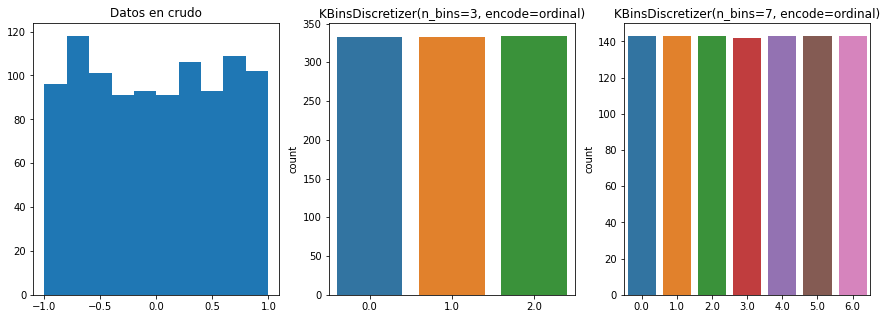

In [34]:
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

data = np.random.uniform(-1, 1, 1000).reshape(-1, 1)

axs[0].set_title('Datos en crudo')
axs[0].hist(data)

axs[1].set_title('KBinsDiscretizer(n_bins=3, encode=ordinal)')
sns.countplot(KBinsDiscretizer(n_bins=3, encode='ordinal').fit_transform(data).flatten(), ax=axs[1])

axs[2].set_title('KBinsDiscretizer(n_bins=7, encode=ordinal)')
sns.countplot(KBinsDiscretizer(n_bins=7, encode='ordinal').fit_transform(data).flatten(), ax=axs[2])

## Normalización

Otra transformación habitual para este tipo de datos es la conocida como **normalización**. La normalización es el proceso de escalar cada muestra individual para que tengan la norma unitaria. Dicho de otro modo, si asumimos cada muestra como un vector *n*-dimensional (*n* es el número de características), mediante la normalización logramos que estos vectores tengan dimensión 1.

Para ello, existen tres normas:

- *L1*, se normaliza mediante la suma de los valores absolutos de sus componentes.
- *L2*, se normaliza mediante la raíz cuadrada de la suma de sus componentes al cuadrado.
- *max*, se normaliza mediante elemento mayor de sus componentes.

Por ejemplo, si tenemos el vector $X = [-3, 4]$ obtendríamos:

- *L1*: la norma se calcula como $|-3| + |4| = 7$ y el vector quedaría $X^\prime = [-0.43, 0.57]$.
- *L2*: la norma se calcula como $\sqrt{(-3)^2 + 4^2} = \sqrt{9+16} = \sqrt{25} = 5$ y el vector quedaría $X^\prime = [-0.6, 0.8]$.
- *max*: la norma sería $4$ y el vector quedaría $X^\prime = [-0.75, 1]$.

La más utilizada es la norma L2 y suele aplicarse cuando el algoritmo seleccionado utiliza una forma cuadrática como, por ejemplo, el producto escalar, para calcular la similaridad entre cada par de muestras.

Para la normalización utilizaremos [normalize](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html#sklearn.preprocessing.normalize):

In [35]:
from sklearn.preprocessing import normalize
X = np.array([[3, 4], [7, -1]])

In [36]:
normalize(X, norm='l1')

array([[ 0.42857143,  0.57142857],
       [ 0.875     , -0.125     ]])

In [37]:
normalize(X, norm='l2')

array([[ 0.6       ,  0.8       ],
       [ 0.98994949, -0.14142136]])

In [38]:
normalize(X, norm='max')

array([[ 0.75      ,  1.        ],
       [ 1.        , -0.14285714]])

## Kolmogorov-Smirnov Test

Aunque, como hemos mencionado, la mayoría de los datos usados en *machine learning* siguen una distribución normal y, por tanto, habitualmente serán estandarizados, antes de aplicar cualquier transformación debemos verificar que cumplen los pre-requisitos de esta, es decir, que se ajustan a la distribución de entrada esperada por el transformador. Para ello debemos aplicar el test de Kolmogorov-Smirnov disponible en `scipy`.

Por ejemplo, si queremos comprobar la normalidad de unos datos uniformes:

In [39]:
from scipy import stats

X = np.random.uniform(-1, 1, 1000).reshape(-1, 1)
stats.kstest(X, 'norm')

KstestResult(statistic=0.8409350260064457, pvalue=0.0)

Si la hipótesis se cumple, el `statistic` debería ser cercano a 0:

In [40]:
X = np.random.normal(0, 1, 1000)
stats.kstest(X, 'norm')

KstestResult(statistic=0.022159183623765732, pvalue=0.710011415341403)

<hr>

Creado por **Fernando Ortega** (fernando.ortega@upm.es)

<img src="https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png">